In [92]:
import pandas as pd
from Bio import SeqIO
import subprocess
import matplotlib.pylab as plt
%matplotlib inline
from scipy import stats

In [125]:
info = pd.read_csv('/home/richard/research/tests/Nov24BranchPoint/speciesInfo.csv')
info.index = info.shortName
info.loc['TrireRUTC30_1','longName'] = 'Trichoderma reesei or Trire2'

In [ ]:
info.lo

In [16]:
seqs = list(SeqIO.parse('/storage3/w/richard/meta2015/placeForRNASeq/Aspoch1/data/Aspoch1_AssemblyScaffolds.fasta','fasta'))
seqs = {seq.id:seq for seq in seqs}

In [9]:
seqs[0][2168:2903].reverse_complement()

SeqRecord(seq=Seq('ATGCAGCGGTTCCAGGCCGGCCAGACCCAGGTCATCAGTGCCACCAGTGCATTA...TAA', SingleLetterAlphabet()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [40]:
intron_info = []
with open('/storage3/w/alexl/Fa/Spapa3/annot/introns_cds.gff') as f:
    for line in f:
        elems = line.split()
        contig = elems[0]
        a,b = int(elems[3]), int(elems[4])
        is_negative = '-' in elems[6]
        if a<b:
            intron_info.append((contig, a,b, is_negative))

In [41]:
seqs = list(SeqIO.parse('/storage3/w/alexl/Fa/Spapa3/data/genome.fasta','fasta'))
seqs = {seq.id:seq for seq in seqs}

In [42]:
introns = []
for contig, a, b, is_negative in intron_info:
    intron = seqs[contig][a-1:b]
    
    if is_negative:
        intron = intron.reverse_complement()
        intron.description = ''
        intron.id = '{}_{}_{}'.format(contig,a,b)
        introns.append(intron)
    else:
        intron.description = ''
        intron.id = '{}_{}_{}'.format(contig,a,b)
        introns.append(intron)

In [44]:
SeqIO.write(introns,'/home/richard/research/tests/Nov24BranchPoint/test/test.fasta','fasta')

1053

In [48]:
# for shortName in info.shortName:
#     command = 'mkdir /home/richard/research/tests/Nov24BranchPoint/introns/{}'.format(shortName)
#     subprocess.check_call(command, shell = True)

In [51]:
## start batch processing
for shortName in info.shortName:
    intron_info = []
    with open('/storage3/w/alexl/Fa/{}/annot/introns_cds.gff'.format(shortName)) as f:
        for line in f:
            elems = line.split()
            contig = elems[0]
            a,b = int(elems[3]), int(elems[4])
            is_negative = '-' in elems[6]
            if a<b:
                intron_info.append((contig, a,b, is_negative))
                
#     seqs = list(SeqIO.parse('/storage3/w/alexl/Fa/{}/data/genome.fasta'.format(shortName),'fasta'))
#     seqs = {seq.id:seq for seq in seqs}
    
#     introns = []
#     for contig, a, b, is_negative in intron_info:
#         intron = seqs[contig][a-1:b]

#         if is_negative:
#             intron = intron.reverse_complement()
#             intron.description = ''
#             intron.id = '{}_{}_{}'.format(contig,a,b)
#             introns.append(intron)
#         else:
#             intron.description = ''
#             intron.id = '{}_{}_{}'.format(contig,a,b)
#             introns.append(intron)
    
#     SeqIO.write(introns,'/home/richard/research/tests/Nov24BranchPoint/introns/{}_intron.fasta'.format(shortName),'fasta')

In [66]:
## 50 nuc upstream
for shortName in info.shortName:
    intron_info = []
    with open('/storage3/w/alexl/Fa/{}/annot/introns_cds.gff'.format(shortName)) as f:
        for line in f:
            elems = line.split()
            contig = elems[0]
            a,b = int(elems[3]), int(elems[4])
            is_negative = '-' in elems[6]
            if b-a > 50:
                intron_info.append((contig, a,b, is_negative))
                
    seqs = list(SeqIO.parse('/storage3/w/alexl/Fa/{}/data/genome.fasta'.format(shortName),'fasta'))
    seqs = {seq.id:seq for seq in seqs}
    
    introns = []
    for contig, a, b, is_negative in intron_info:
        intron = seqs[contig][b-50:b-5]

        if is_negative:
            intron = intron.reverse_complement()
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
        else:
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
    
    SeqIO.write(introns,'/home/richard/research/tests/Nov24BranchPoint/introns/{}_intron.fasta'.format(shortName),'fasta')

In [140]:
## to address the signal issue, choose a subset of motif
for shortName in info.shortName:
    intron_info = []
    with open('/storage3/w/alexl/Fa/{}/annot/introns_cds.gff'.format(shortName)) as f:
        for line in f:
            elems = line.split()
            contig = elems[0]
            a,b = int(elems[3]), int(elems[4])
            is_negative = '-' in elems[6]
            if b-a > 50:
                intron_info.append((contig, a,b, is_negative))
                
    seqs = list(SeqIO.parse('/storage3/w/alexl/Fa/{}/data/genome.fasta'.format(shortName),'fasta'))
    seqs = {seq.id:seq for seq in seqs}
    
    introns = []
    for contig, a, b, is_negative in intron_info:
        intron = seqs[contig][a-1:b]

        if is_negative:
            intron = intron.reverse_complement()
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
        else:
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
    
    SeqIO.write(introns,'/home/richard/research/tests/Nov24BranchPoint/intron_long/{}_intron.fasta'.format(shortName),'fasta')

In [143]:
## 50 nuc upstream, corrected version
for shortName in info.shortName:
    intron_info = []
    with open('/storage3/w/alexl/Fa/{}/annot/introns_cds.gff'.format(shortName)) as f:
        for line in f:
            elems = line.split()
            contig = elems[0]
            a,b = int(elems[3]), int(elems[4])
            is_negative = '-' in elems[6]
            if b-a > 500:
                intron_info.append((contig, a,b, is_negative))
    print shortName, len(intron_info)
                
    seqs = list(SeqIO.parse('/storage3/w/alexl/Fa/{}/data/genome.fasta'.format(shortName),'fasta'))
    seqs = {seq.id:seq for seq in seqs}
    
    introns = []
    for contig, a, b, is_negative in intron_info:
        intron = seqs[contig][b-80:b-5]

        if is_negative:
            intron = intron.reverse_complement()
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
        else:
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
    
    SeqIO.write(introns,'/home/richard/research/tests/Nov24BranchPoint/introns_weak/{}_intron.fasta'.format(shortName),'fasta')

Spapa3 39
Picst3 90
Canta1 89
Debha1 6
Hypbu1 95
Cante1 34
Metbi1 137
Babin1 192
Canar1 196
Hanpo2 29
Picme2 129
Dekbr2 265
Picpa1 6
Pacta1_2 68
Klula1 44
Ashgo1_1 2
Sacce1 21
Hanva1_1 166
Wican1 100
Cybja1 124
Ascru1 267
Nadfu1 143
Yarli1 180
Canca1 47
Lipst1_1 82
Neucr2 275
TrireRUTC30_1 342
Aspnid1 162
Tubme1 185
Schpo1 18
Pneji1 123
Tapde1_1 60
Saico1 68
Cryne_H99_1 93
Schco3 524
Rhior3 74
Batde5 620


In [ ]:
## 80 nuc upstream, corrected version
for shortName in info.shortName:
    intron_info = []
    with open('/storage3/w/alexl/Fa/{}/annot/introns_cds.gff'.format(shortName)) as f:
        for line in f:
            elems = line.split()
            contig = elems[0]
            a,b = int(elems[3]), int(elems[4])
            is_negative = '-' in elems[6]
            if b-a > 500:
                intron_info.append((contig, a,b, is_negative))
    print shortName, len(intron_info)
                
    seqs = list(SeqIO.parse('/storage3/w/alexl/Fa/{}/data/genome.fasta'.format(shortName),'fasta'))
    seqs = {seq.id:seq for seq in seqs}
    
    introns = []
    for contig, a, b, is_negative in intron_info:
        intron = seqs[contig][b-50:b-5]

        if is_negative:
            intron = intron.reverse_complement()
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
        else:
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
    
    SeqIO.write(introns,'/home/richard/research/tests/Nov24BranchPoint/introns/{}_intron.fasta'.format(shortName),'fasta')

In [145]:
## 80 nuc upstream, unfiltered
for shortName in info.shortName:
    intron_info = []
    with open('/storage3/w/alexl/Fa/{}/annot/introns_cds.gff'.format(shortName)) as f:
        for line in f:
            elems = line.split()
            contig = elems[0]
            a,b = int(elems[3]), int(elems[4])
            is_negative = '-' in elems[6]
            if b-a > 85:
                intron_info.append((contig, a,b, is_negative))
    print shortName, len(intron_info)
                
    seqs = list(SeqIO.parse('/storage3/w/alexl/Fa/{}/data/genome.fasta'.format(shortName),'fasta'))
    seqs = {seq.id:seq for seq in seqs}
    
    introns = []
    for contig, a, b, is_negative in intron_info:
        intron = seqs[contig][b-85:b-5]

        if is_negative:
            intron = intron.reverse_complement()
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
        else:
            intron.description = ''
            intron.id = '{}_{}_{}'.format(contig,a,b)
            introns.append(intron)
    
    SeqIO.write(introns,'/home/richard/research/tests/Nov24BranchPoint/introns_long_unfiltered/{}_intron.fasta'.format(shortName),'fasta')

Spapa3 451
Picst3 931
Canta1 661
Debha1 197
Hypbu1 626
Cante1 452
Metbi1 778
Babin1 734
Canar1 1045
Hanpo2 280
Picme2 770
Dekbr2 1157
Picpa1 181
Pacta1_2 1106
Klula1 150
Ashgo1_1 83
Sacce1 222
Hanva1_1 502
Wican1 689
Cybja1 662
Ascru1 1627
Nadfu1 1657
Yarli1 757
Canca1 377
Lipst1_1 1230
Neucr2 6446
TrireRUTC30_1 6556
Aspnid1 4523
Tubme1 4187
Schpo1 1229
Pneji1 1242
Tapde1_1 266
Saico1 713
Cryne_H99_1 3809
Schco3 7885
Rhior3 8990
Batde5 15527


In [72]:
## get intron length distribution
intron_info = {}
for shortName in info.shortName:
    intron_info[shortName] = []
    with open('/storage3/w/alexl/Fa/{}/annot/introns_cds.gff'.format(shortName)) as f:
        for line in f:
            elems = line.split()
            contig = elems[0]
            a,b = int(elems[3]), int(elems[4])
            is_negative = '-' in elems[6]
            if a<b:
                intron_info[shortName].append(b-a+1)

In [118]:
target = '/home/richard/research/tests/Nov24BranchPoint/intron_length_distr/'

In [134]:
n = 300
for shortName in info.shortName:
    lengths = {i:0 for i in range(3001)} 
    for number in intron_info[shortName]:
        if number < 3000:
            lengths[number]+=1
    total = sum(lengths.values())
    for i in range(3001):
        lengths[i] = 1.*lengths[i]/total
    
    plt.figure()
    plt.plot(range(n), [lengths[i] for i in range(n)])
    plt.title('Intron length distribution\n{}, shortName: {}\n GC: {}, Intron Density: {}'.format(info.ix[shortName]['longName'], shortName, info.ix[shortName]['gc'], info.ix[shortName]['inron density']))
    plt.xlabel('Intron Length')
    plt.ylabel('Probability')
    plt.ylim(0,0.1)
    plt.savefig(target+shortName, bbox_inches='tight')
    plt.close()

In [107]:
###################  test codes ############################

In [73]:
print list(info.shortName)

['Spapa3', 'Picst3', 'Canta1', 'Debha1', 'Hypbu1', 'Cante1', 'Metbi1', 'Babin1', 'Canar1', 'Hanpo2', 'Picme2', 'Dekbr2', 'Picpa1', 'Pacta1_2', 'Klula1', 'Ashgo1_1', 'Sacce1', 'Hanva1_1', 'Wican1', 'Cybja1', 'Ascru1', 'Nadfu1', 'Yarli1', 'Canca1', 'Lipst1_1', 'Neucr2', 'TrireRUTC30_1', 'Aspnid1', 'Tubme1', 'Schpo1', 'Pneji1', 'Tapde1_1', 'Saico1', 'Cryne_H99_1', 'Schco3', 'Rhior3', 'Batde5']


In [78]:
test = {i:0 for i in range(3001)}    

In [88]:
for number in intron_info['Spapa3']:
    if number < 3000:
        test[number]+=1
total = sum(test.values())
for i in range(3001):
    test[i] = 1.*test[i]/total

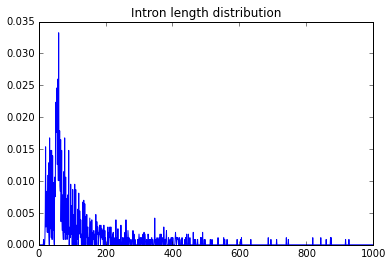

In [101]:
plt.plot(range(1001), [test[i] for i in range(1001)])
plt.title('Intron length distribution')
p

In [97]:
## tried gamma fitting, but not very good

In [93]:
shape,loc,scale = stats.gamma.fit(intron_info['Spapa3'])
print "shape = {}, scale = {}".format(shape,scale)

shape = 0.147611698585, scale = 533.261437891


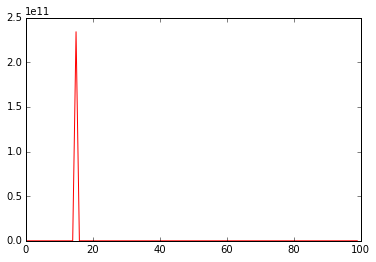

In [96]:
n =100
plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')